In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root = "/content/drive/My Drive/data/kaggle-pneumonia/"

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 29.5 MB/s 


In [ ]:
!pip install -Uqq ipdb

     |████████████████████████████████| 793 kB 41.2 MB/s 
     |████████████████████████████████| 1.6 MB 44.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 7.34.0 which is incompatible.


In [ ]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os
import glob
import ipdb
import numpy as np

In [ ]:
%pdb = on

Incorrect argument. Use on/1, off/0, or nothing for a toggle.


In [ ]:
labels = pd.read_csv(root + "stage_2_train_labels.csv")

In [ ]:
labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [ ]:
labels = labels.drop_duplicates("patientId")

In [ ]:
labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
10,008c19e8-a820-403a-930a-bc74a4053664,NaN,NaN,NaN,NaN,0
11,009482dc-3db5-48d4-8580-5c89c4f01334,NaN,NaN,NaN,NaN,0


In [ ]:
root_path = Path(root + "/stage_2_train_images/")
save_path = Path(root + "proc/")

/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/00322d4d-1c29-4943-afc9-b6754be640eb.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/00569f44-917d-4c86-a842-81832af98c30.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/006cec2e-6ce2-4549-bffa-eadfcd1e9970.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/00704310-78a8-4b38-8475-49f4573b2dbb.dcm
/content/drive/My Drive/data/kaggle-pneumonia/stage_2_train_images/008c19e8-a820-403a-930a-bc74a4053664.dcm


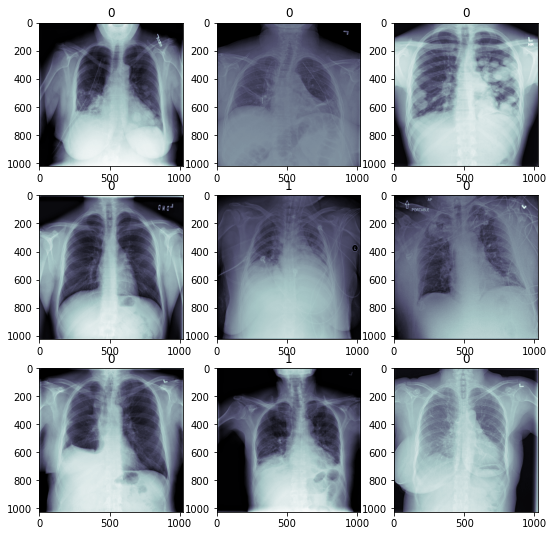

In [ ]:
fig , ax = plt.subplots(3,3,figsize=(9,9))
counter = 0
for i in range(3):
  for j in range(3):
    patient_id = labels.patientId.iloc[counter]
    dcm_path = root_path/patient_id
    dcm_path = dcm_path.with_suffix(".dcm")
    print(dcm_path)
    dcm = pydicom.read_file(dcm_path).pixel_array
    label = labels["Target"].iloc[counter]

    ax[i][j].imshow(dcm , cmap = 'bone')
    ax[i][j].set_title(label)

    counter +=1

In [ ]:
lentrain=len(os.listdir(root + "/stage_2_train_images/"))

In [ ]:
lentrain

26684

In [ ]:
round(lentrain * 0.9)

24016

In [ ]:
lentest= len(os.listdir(root + "/stage_2_test_images/"))

In [ ]:
lentest

3000

In [ ]:
sums = 0
sums_sqr = 0 
x = round(lentrain * 0.9)
for counter , patient_id in enumerate(tqdm(labels.patientId)):
  dcm_path = root_path/patient_id
  dcm_path = dcm_path.with_suffix(".dcm")

  if os.path.exists(dcm_path):
    dcm = pydicom.read_file(dcm_path).pixel_array/255
    dcm_resized = cv2.resize(dcm , (224,224)).astype(np.float16)
    label = labels.Target.iloc[counter]
    train_val = "train" if counter < x else "val"

    my_save_path = save_path/train_val/str(label)
    my_save_path.mkdir(parents= True , exist_ok = True)
    np.save(my_save_path/patient_id, dcm_resized)
    
    normalizer = dcm_resized.shape[0] * dcm_resized.shape[1]
    if train_val == "train" :
      sums +=np.sum(dcm_resized)/ normalizer
      sums_sqr += (np.power(dcm_resized , 2).sum())/ normalizer
  

  0%|          | 0/26684 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
sums = 0
sums_sqr = 0

for files in glob.glob("/content/drive/My Drive/data/kaggle-pneumonia/processed/train/**/*.npy"):
  dcm = np.load(files)
  normalizer = dcm.shape[0]*dcm.shape[1]
  sums += np.sum(dcm) /  normalizer
  sums_sqr += (np.power(dcm , 2).sum()) / normalizer

In [ ]:
sums = 11776

In [ ]:
sums_sqr = 7251

In [ ]:
mean = sums / lentrain

In [ ]:
std = np.sqrt(sums_sqr / lentrain - (mean**2))

In [ ]:
mean , std

(0.44131314645480435, 0.27745013687069287)

In [ ]:
!pip install torchmetrics
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 29.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 34.0 MB/s 


In [ ]:
import torch
import torchvision
from torchvision import transforms
import torchmetrics
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_file(path):
  return np.load(path).astype(np.float32)

In [ ]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.44 , 0.27 ), 
    transforms.RandomAffine(degrees = (-5,+5),translate=(0, 0.05), scale=(0.9 , 1.1)),
    transforms.RandomResizedCrop((224, 224), scale=(0.35, 1))
])


val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.44] , [0.27] )
])

In [ ]:
train_dataset = torchvision.datasets.DatasetFolder(root + "processed/train/" ,loader = load_file, extensions = "npy" ,transform =  train_transforms)
val_dataset = torchvision.datasets.DatasetFolder(root + "processed/val/" ,loader = load_file, extensions = "npy" ,transform = val_transforms)

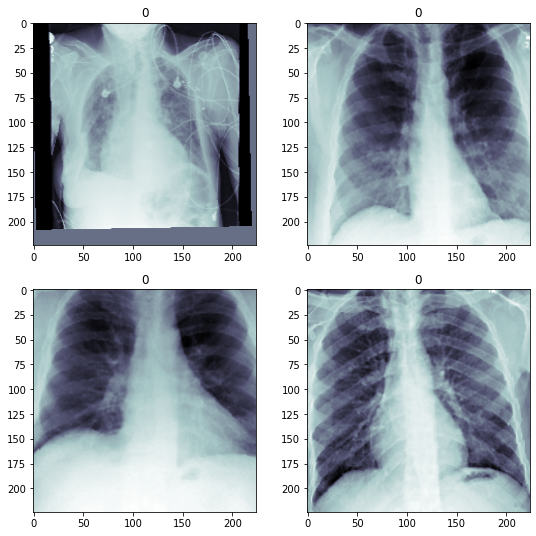

In [ ]:
fig , ax = plt.subplots(2,2,figsize =(9,9))
for i in range(2):
  for j in range(2):
    ind = np.random.randint(0,20000)
    x_ray, label = train_dataset[ind]

    ax[i][j].imshow(x_ray[0], cmap="bone")
    ax[i][j].set_title(label)

In [ ]:
batch_size = 64
num_workers = 4

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset , batch_size=batch_size , num_workers=num_workers ,shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset , batch_size=batch_size , num_workers=num_workers ,shuffle = False)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
model = torchvision.models.resnet18()

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class PnuModel(pl.LightningModule):
  def __init__(self, weight=1):
    super().__init__()
    self.model = torchvision.models.resnet18()
    self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    self.model.fc = torch.nn.Linear(in_features=512, out_features=1)

    self.optimizer = torch.optim.Adam(self.model.parameters(),lr = 1e-4)
    self.loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor([weight]))
    
    self.train_acc = torchmetrics.Accuracy()
    self.val_acc = torchmetrics.Accuracy()

  def forward(self, data):
    pred = self.model(data)
    return pred

  def training_step(self , batch , batch_idx):
    x_ray , label = batch
    label = label.float()
    pred = self(x_ray)[: , 0]
    loss = self.loss_fn(pred , label)

    self.log("train loss" , loss)
    self.log("step  train acc" , self.train_acc(torch.sigmoid(pred),label.int()))
    return loss

  def training_epoch_end(self, outputs):
    self.log("train_acc", self.train_acc.compute())


  def validation_step(self , batch , batch_idx):
    x_ray , label = batch
    label = label.float()
    pred = self(x_ray)[: , 0]
    loss = self.loss_fn(pred , label)

    self.log("val loss" , loss)
    self.log("step val acc" , self.val_acc(torch.sigmoid(pred),label.int()))
    return loss

  def val_epoch_end(self, outputs):
    self.log("val_acc", self.val_acc.compute())


  def configure_optimizers(self):
    return [self.optimizer]

In [ ]:
model = PnuModel()

In [ ]:
model

PnuModel(
  (model): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [ ]:
checkpoint_callback = ModelCheckpoint(
    monitor="Val Acc",
    save_top_k = 10 , 
    mode = "max"
)

In [ ]:
gpus = 1
trainer =  pl.Trainer(logger = TensorBoardLogger(save_dir = root+"logs"),gpus=gpus,log_every_n_steps=1 , callbacks=checkpoint_callback , max_epochs=35)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model ,train_loader , val_loader )

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params
------------------------------------------------
0 | model     | ResNet            | 11.2 M
1 | loss_fn   | BCEWithLogitsLoss | 0     
2 | train_acc | Accuracy          | 0     
3 | val_acc   | Accuracy          | 0     
------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.683    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model  =PnuModel.load_from_checkpoint("drive/My Drive/data/kaggle-pneumonia/logs/lightning_logs/version_0/checkpoints/epoch=32-step=12408.ckpt")
model.eval()
model.to(device);

In [ ]:
preds = []
labels = []


with torch.no_grad():
  for data , label in tqdm(val_dataset):
    data = data.to(device).float().unsqueeze(0)

    pred = torch.sigmoid(model(data)[0].cpu())
    preds.append(pred)
    labels.append(label)

preds = torch.tensor(preds)
labels = torch.tensor(labels).int()

  0%|          | 0/2668 [00:00<?, ?it/s]

In [ ]:
acc = torchmetrics.Accuracy()(preds , labels)
precision = torchmetrics.Precision()(preds , labels)
recall = torchmetrics.Recall()(preds , labels)
CM = torchmetrics.ConfusionMatrix(num_classes = 2)(preds,labels)
CM_threshold = torchmetrics.ConfusionMatrix(num_classes=2 ,threshold=0.25 )(preds,labels)


print(f"acc : {acc}")
print(f"precision : {precision}")
print(f"recall : {recall}")
print(f"CM : {CM}")
print(f"CM_threshold : {CM_threshold}")


acc : 0.8470764756202698
precision : 0.7268518805503845
recall : 0.5198675394058228
CM : tensor([[1946,  118],
        [ 290,  314]])
CM_threshold : tensor([[1628,  436],
        [ 116,  488]])


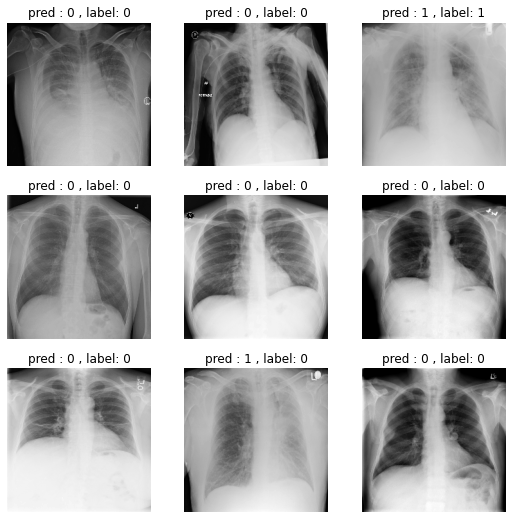

In [ ]:
fig , ax = plt.subplots(3,3,figsize=(9,9))


for i in range(3):
  for j in range(3):
    random_idx = np.random.randint(0, len(preds))
    ax[i][j].imshow(val_dataset[random_idx][0][0] , cmap = "gray")
    ax[i][j].set_title(f"pred : {int(preds[random_idx] > 0.5)} , label: {labels[random_idx]}")
    ax[i][j].axis("off")

In [ ]:
!pip install torchmetrics
!pip install pytorch_lightning 

In [ ]:
%matplotlib notebook
import torch
import torchvision
from torchvision import transforms
import pytorch_lightning as pl
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_file(path):
    return np.load(path).astype(np.float32)

In [ ]:
val_transforms = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(0.44, 0.27),

])


val_dataset = torchvision.datasets.DatasetFolder(root + "processed/val/", loader=load_file, extensions="npy", transform=val_transforms)

In [ ]:
temp_model = torchvision.models.resnet18()
temp_model

In [ ]:
list(temp_model.children())[:-2]

In [ ]:
torch.nn.Sequential(*list(temp_model.children())[:-2])

In [ ]:
class PnuModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.model = torchvision.models.resnet18()
        self.model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.model.fc = torch.nn.Linear(in_features=512, out_features=1)
        
        self.feature_map = torch.nn.Sequential(*list(self.model.children())[:-2])    
    def forward(self, data):
        
        feature_map = self.feature_map(data)
       
        avg_pool_output = torch.nn.functional.adaptive_avg_pool2d(input=feature_map, output_size=(1, 1))
        print(avg_pool_output.shape)

        avg_pool_output_flattened = torch.flatten(avg_pool_output)
        print(avg_pool_output_flattened.shape)

        pred = self.model.fc(avg_pool_output_flattened)
        return pred, feature_map
    

In [ ]:
def cam(model, img):
    with torch.no_grad():
        pred, features = model(img.unsqueeze(0))
    features = features.reshape((512, 49))
    weight_params = list(model.model.fc.parameters())[0]
    weight = weight_params[0].detach()
    
    cam = torch.matmul(weight, features) 
    cam_img = cam.reshape(7, 7).cpu()
    return cam_img, torch.sigmoid(pred)

In [ ]:
model = PnuModel.load_from_checkpoint("drive/My Drive/data/kaggle-pneumonia/logs/lightning_logs/version_0/checkpoints/epoch=32-step=12408.ckpt", strict=False)
model.eval();

In [ ]:
def cam(model, img):
    with torch.no_grad():
        pred, features = model(img.unsqueeze(0))
    b, c, h, w = features.shape
    features = features.reshape((c, h*w))
    weight_params = list(model.model.fc.parameters())[0] 
    weight = weight_params[0].detach()
    print(weight.shape)
    cam = torch.matmul(weight, features)
    print(features.shape)
    cam = cam - torch.min(cam)
    cam_img = cam / torch.max(cam)
    cam_img = cam_img.reshape(h, w).cpu()

    return cam_img, torch.sigmoid(pred)

def visualize(img, heatmap, pred):

    img = img[0]
    heatmap = transforms.functional.resize(heatmap.unsqueeze(0), (img.shape[0], img.shape[1]))[0]

    fig, axis = plt.subplots(1, 2)
    
    axis[0].imshow(img, cmap="bone")
    axis[1].imshow(img, cmap="bone")
    axis[1].imshow(heatmap, alpha=0.5, cmap="jet")
    plt.title(f"Pneumonia: {(pred > 0.5).item()}")

In [ ]:
def visualize(img, cam, pred):
    img = img[0]
    cam = transforms.functional.resize(cam.unsqueeze(0), (224, 224))[0]
    
    fig, axis = plt.subplots(1, 2)
    axis[0].imshow(img, cmap="bone")
    axis[1].imshow(img, cmap="bone")
    axis[1].imshow(cam, alpha=0.5, cmap="jet")
    plt.title(pred)


In [ ]:
img = val_dataset[-1][0]
activation_map, pred = cam(model, img)

In [ ]:
print(pred)

In [ ]:
visualize(img, activation_map, pred)